# 🔢 AI Digit Classifier - Recognizing Handwritten Digits from Images 🖼️
Welcome, data scientists! Your mission is to classify handwritten digits into the correct categories (0-9) using supervised learning algorithms. We will follow these steps:

هدف هذا المشروع هو تدريب نماذج تعلم الآلة لتصنيف الأرقام المكتوبة بخط اليد (من 0 إلى 9) بشكل دقيق. سنقوم باستخدام بيانات صور الأرقام (Digits Dataset) المتاحة في مكتبة scikit-learn.

1. Flatten images (Convert 8x8 pixel images to vectors)
2. Train multiple classifiers and compare accuracy
3. Evaluate models using accuracy and confusion matrix

You will use Logistic Regression, Decision Tree, Boosting, or KNN to achieve this goal. Let's dive in! 🚀

## 📦 Install & Import Necessary Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.tree import plot_tree


# FOR NLP
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import SnowballStemmer

# Train and Test Classifiers
# LogisticRegression
from sklearn.linear_model import LogisticRegression
# 🌲 Decision Tree
from sklearn.tree import DecisionTreeClassifier
#⚡ Boosting (Gradient Boosting)
from sklearn.ensemble import GradientBoostingClassifier
#👬 K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
# for metrics using precision, recall, and F1-score.
from sklearn.metrics import accuracy_score, confusion_matrix

## 📂 Load the Dataset

In [5]:
# Load the dataset
digits = load_digits()

## 📊 Convert to DataFrame

In [7]:
# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target

df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [8]:
# Display the unique labels in the training DataFrame
df['target'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Exploration dataset

In [10]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

# Preprocessing the Data

#### Check for missing values

In [14]:
df.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

#### Check for duplicates

In [16]:
df.duplicated().sum()

0

#### Distribution

In [18]:
# Distribution of categories
digit_counts = df['target'].value_counts()
digit_counts

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

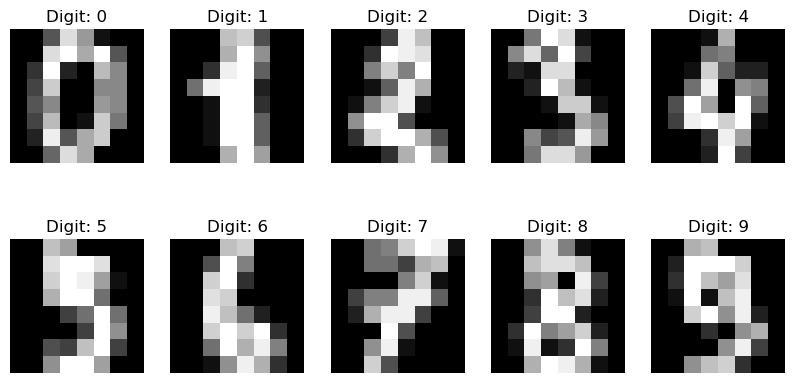

In [19]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Digit: {digits.target[i]}")
    plt.axis('off')

plt.show()

## 📝 Preprocess the Data

In [21]:
# Flatten the images (convert 8x8 pixel images to vectors)
X = digits.data
y = digits.target

# Display shapes of the features and labels
print(X.shape, y.shape)

(1797, 64) (1797,)


### 📝 Split Data into Training and Testing Sets

In [23]:
# Split the data into training and testing sets with a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.3, random_state=42)

# Display sizes of the training and testing sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1257, 64)
Testing set size: (540, 64)


## 🤖 Train and Test Classifiers

### 📈 Logistic Regression

In [25]:
# Initialize and train the classifier
logisticRegressionClassifiers = LogisticRegression()
logisticRegressionClassifiers.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Predict
y_predict_logisticRegressionClassifiers = logisticRegressionClassifiers.predict(X_test)

In [27]:
# Evaluate
accuracy_lr = accuracy_score(y_test, y_predict_logisticRegressionClassifiers)
accuracy_lr

0.9648148148148148

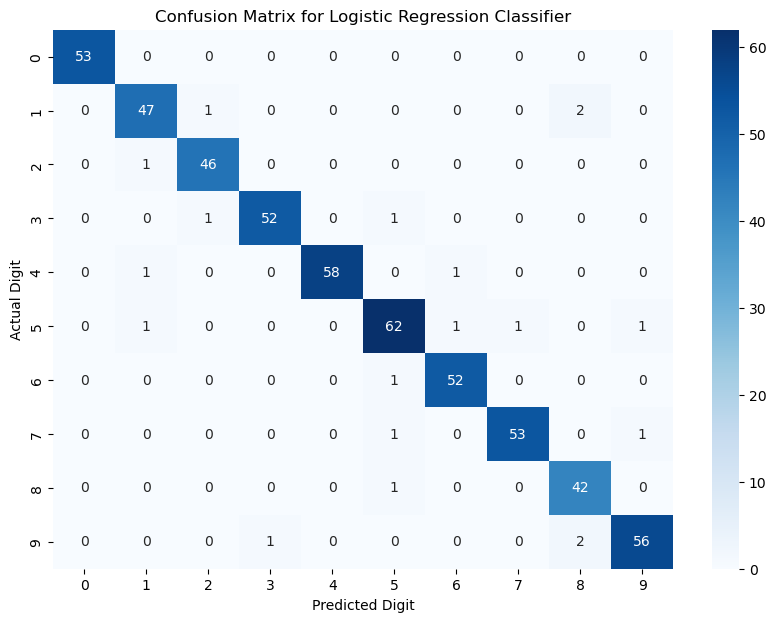

In [28]:
conf_matrix_lr = confusion_matrix(y_test, y_predict_logisticRegressionClassifiers)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Digit')
plt.ylabel('Actual Digit')
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

### 🌲 Decision Tree

In [30]:
# Initialize and train the classifier
decisionTreeClassifiers = DecisionTreeClassifier()
decisionTreeClassifiers.fit(X_train, y_train)

DecisionTreeClassifier()

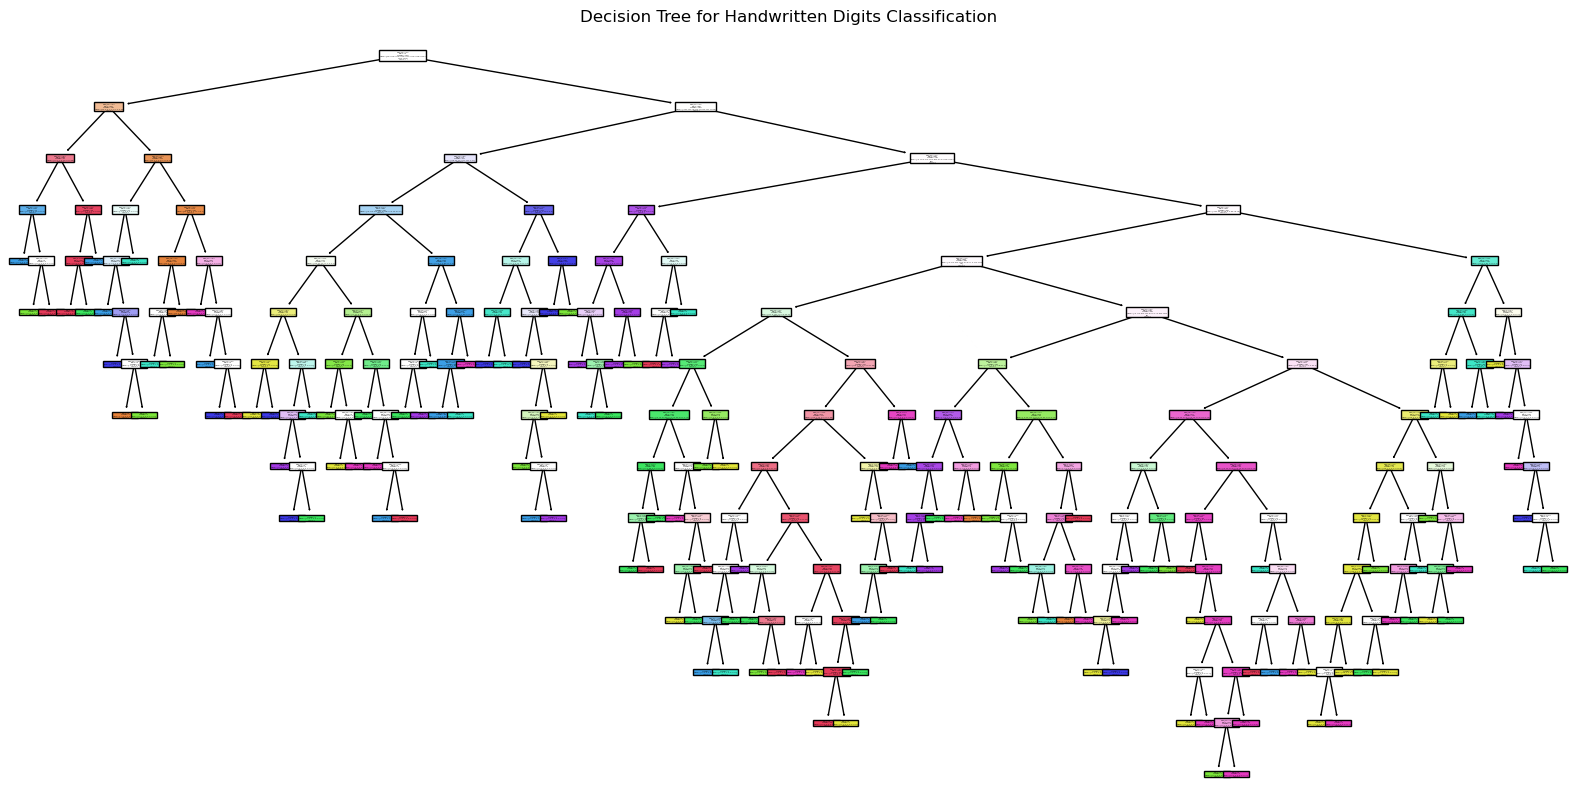

In [31]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decisionTreeClassifiers, filled=True, feature_names=[f'pixel_{i}' for i in range(64)], class_names=[str(i) for i in range(10)])
plt.title("Decision Tree for Handwritten Digits Classification")
plt.show()

In [32]:
# Predict on the test set
y_predict_decisionTreeClassifiers = decisionTreeClassifiers.predict(X_test)

In [33]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_predict_decisionTreeClassifiers)
accuracy_dt

0.8481481481481481

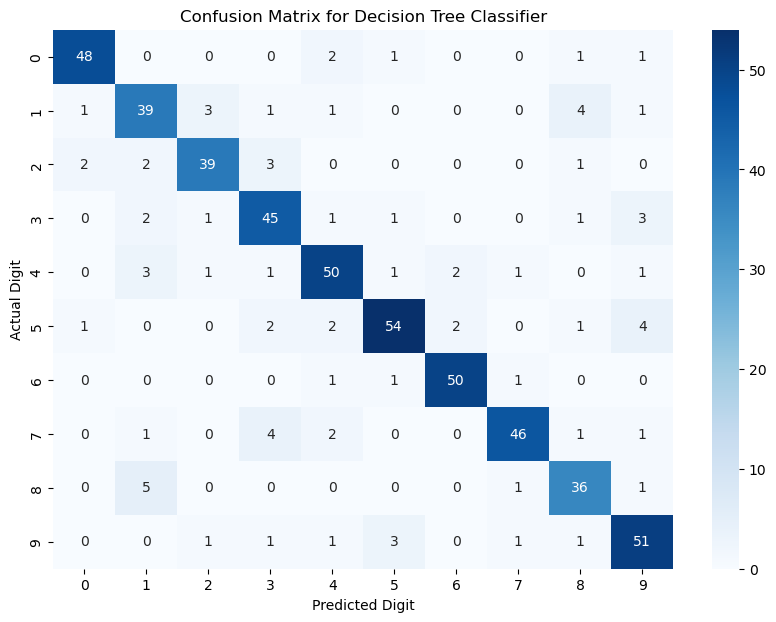

In [34]:
# Plot Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_predict_decisionTreeClassifiers)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Digit')
plt.ylabel('Actual Digit')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

###  ⚡  Boosting (Gradient Boosting)

In [36]:
# Initialize and train the classifier
gradientBoostingClassifiers = GradientBoostingClassifier()
gradientBoostingClassifiers.fit(X_train, y_train)

GradientBoostingClassifier()

In [37]:
# Predict on the test set
y_predict_gradientBoostingClassifiers = gradientBoostingClassifiers.predict(X_test)

In [38]:
# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_predict_gradientBoostingClassifiers)
accuracy_gb

0.9666666666666667

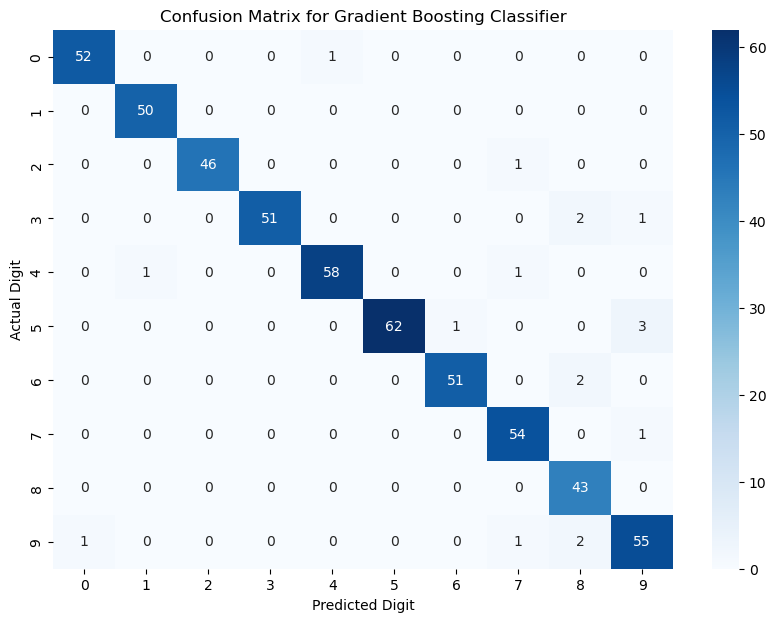

In [39]:
# Plot Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_predict_gradientBoostingClassifiers)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Digit')
plt.ylabel('Actual Digit')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

### 👬 K-Nearest Neighbors (KNN)

In [41]:
# Initialize and train the classifier
kNearestNeighborsClassifiers = KNeighborsClassifier()
kNearestNeighborsClassifiers.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
# Predict on the test set
y_predict_kNearestNeighborsClassifiers = kNearestNeighborsClassifiers.predict(X_test)

In [43]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_predict_kNearestNeighborsClassifiers)
accuracy_knn

0.9925925925925926

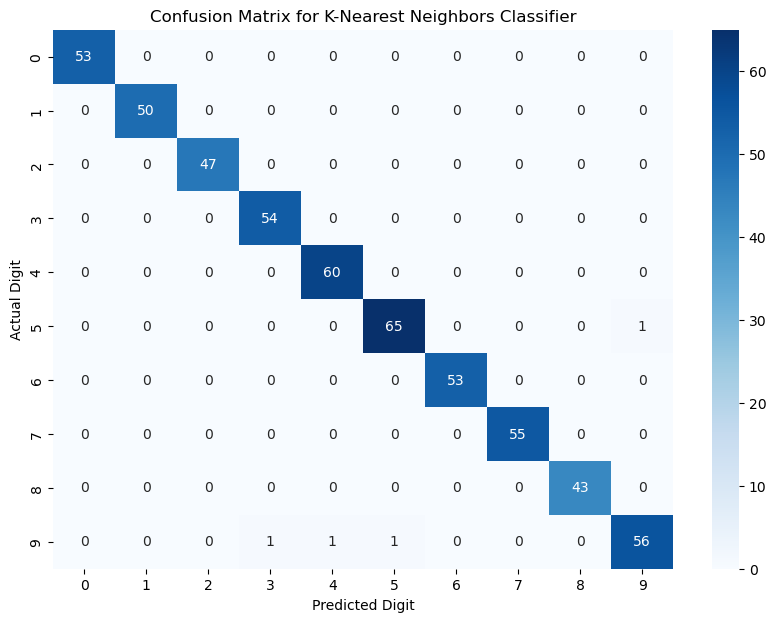

In [44]:
conf_matrix_knn = confusion_matrix(y_test, y_predict_kNearestNeighborsClassifiers)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Digit')
plt.ylabel('Actual Digit')
plt.title('Confusion Matrix for K-Nearest Neighbors Classifier')
plt.show()

## 📊 Compare Accuracy with Plotting

In [46]:
# Accuracy values for each classifier
accuracy_scores = {
    'Logistic Regression': accuracy_lr,
    'Decision Tree': accuracy_dt,
    'Gradient Boosting': accuracy_gb,
    'K-Nearest Neighbors': accuracy_knn
}
accuracy_scores

{'Logistic Regression': 0.9648148148148148,
 'Decision Tree': 0.8481481481481481,
 'Gradient Boosting': 0.9666666666666667,
 'K-Nearest Neighbors': 0.9925925925925926}

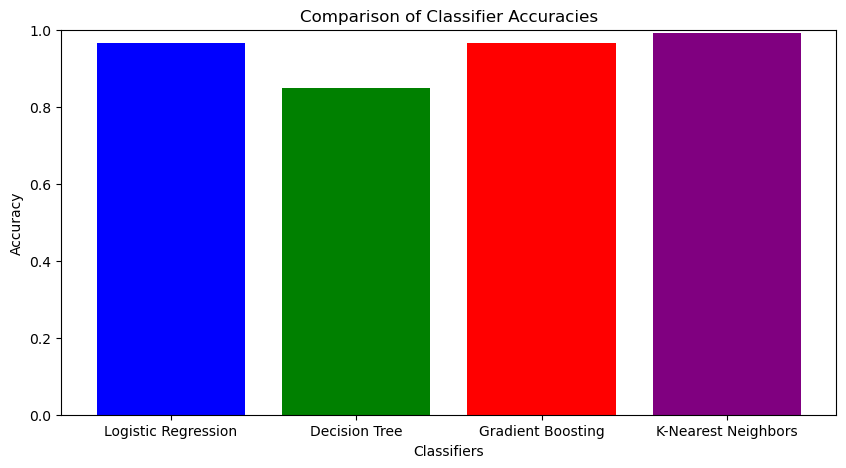

In [47]:
# Plotting the accuracies
plt.figure(figsize=(10, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.ylim(0, 1) 
plt.show()

## 🔍 Test the Classifiers on a New Instance

In [49]:
# New instance representing the digit 9
new_instance = np.array([0, 0, 10, 15, 12, 0, 0, 0,
                         0, 1, 16, 16, 8, 1, 0, 0,
                         0, 4, 16, 13, 1, 12, 0, 0,
                         0, 6, 16, 10, 0, 15, 0, 0,
                         0, 0, 4, 2, 3, 15, 0, 0,
                         0, 0, 0, 0, 0, 16, 0, 0,
                         0, 0, 0, 0, 1, 16, 0, 0,
                         0, 0, 0, 0, 8, 10, 0, 0]).reshape(8, 8)

print("Shape of new_instance:", new_instance.shape) 

Shape of new_instance: (8, 8)


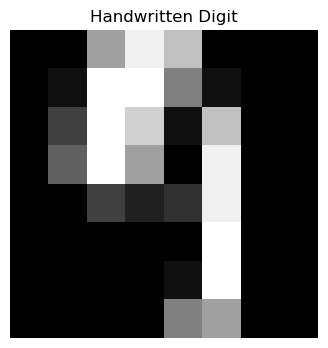

In [50]:
# Plot the image
plt.figure(figsize=(4, 4))
plt.imshow(new_instance, cmap='gray')
plt.title('Handwritten Digit')
plt.axis('off')
plt.show()

In [51]:
# Reshape the new_instance for prediction
new_instance_flattened = new_instance.reshape(1, -1)

# Ensure the new_instance_flattened has the correct shape (1, 64)
print("Shape of new_instance_flattened:", new_instance_flattened.shape)

Shape of new_instance_flattened: (1, 64)


In [52]:
# Predict using each classifier
y_pred_lr = logisticRegressionClassifiers.predict(new_instance_flattened)
y_pred_dt = decisionTreeClassifiers.predict(new_instance_flattened)
y_pred_gb = gradientBoostingClassifiers.predict(new_instance_flattened)
y_pred_knn = kNearestNeighborsClassifiers.predict(new_instance_flattened)

# Print the predictions
print(f"Logistic Regression Prediction: {y_pred_lr[0]}")
print(f"Decision Tree Prediction: {y_pred_dt[0]}")
print(f"Gradient Boosting Prediction: {y_pred_gb[0]}")
print(f"K-Nearest Neighbors Prediction: {y_pred_knn[0]}")

Logistic Regression Prediction: 9
Decision Tree Prediction: 8
Gradient Boosting Prediction: 9
K-Nearest Neighbors Prediction: 9


#### Visualize the Handwritten Digit '0'

In [54]:
# New instance representing the digit 0
new_instance_zero = np.array([0, 1, 8, 13, 10, 1, 0, 0,
                              0, 6, 15, 15, 16, 7, 0, 0,
                              0, 7, 13, 6, 16, 7, 0, 0,
                              0, 7, 16, 15, 13, 7, 0, 0,
                              0, 7, 16, 16, 14, 5, 0, 0,
                              0, 5, 15, 9, 15, 4, 0, 0,
                              0, 2, 15, 10, 15, 2, 0, 0,
                              0, 0, 9, 16, 9, 0, 0, 0]).reshape(8, 8)

print("Shape of new_instance_zero:", new_instance_zero.shape)

Shape of new_instance_zero: (8, 8)


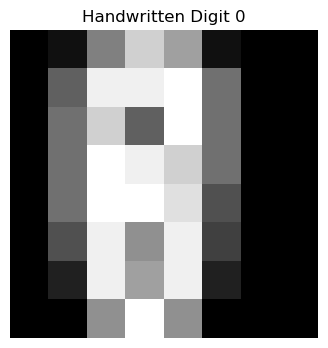

In [55]:
# Plot the image
plt.figure(figsize=(4, 4))
plt.imshow(new_instance_zero, cmap='gray')
plt.title('Handwritten Digit 0')
plt.axis('off')
plt.show()

In [56]:
# Reshape the new_instance_zero for prediction
new_instance_zero_flattened = new_instance_zero.reshape(1, -1)

# Ensure the new_instance_zero_flattened has the correct shape (1, 64)
print("Shape of new_instance_zero_flattened:", new_instance_zero_flattened.shape)

Shape of new_instance_zero_flattened: (1, 64)


In [57]:
# Predict using each classifier
y_pred_lr_zero = logisticRegressionClassifiers.predict(new_instance_zero_flattened)
y_pred_dt_zero = decisionTreeClassifiers.predict(new_instance_zero_flattened)
y_pred_gb_zero = gradientBoostingClassifiers.predict(new_instance_zero_flattened)
y_pred_knn_zero = kNearestNeighborsClassifiers.predict(new_instance_zero_flattened)

In [58]:
# Print the predictions
print(f"Logistic Regression Prediction: {y_pred_lr_zero[0]}")
print(f"Decision Tree Prediction: {y_pred_dt_zero[0]}")
print(f"Gradient Boosting Prediction: {y_pred_gb_zero[0]}")
print(f"K-Nearest Neighbors Prediction: {y_pred_knn_zero[0]}")

Logistic Regression Prediction: 8
Decision Tree Prediction: 1
Gradient Boosting Prediction: 8
K-Nearest Neighbors Prediction: 1


---------------------------------------------------------------------------------------


# 🧠 Classifiers Overview
## 1. Logistic Regression
### Parameters:
- max_iter: Maximum number of iterations.
- C: Inverse of regularization strength.
- solver: Algorithm to use in the optimization problem.

### How it Works: 
Logistic Regression models the probability that each input belongs to a particular class. It uses a logistic function to squeeze the output between 0 and 1.


## 2. Decision Tree
### Parameters:
- max_depth: Maximum depth of the tree.
- min_samples_split: Minimum number of samples required to split an internal node.
- min_samples_leaf: Minimum number of samples required to be at a leaf node.

### How it Works:
Decision Tree builds a tree structure where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents the outcome.

## 3. Gradient Boosting
### Parameters:
- n_estimators: The number of boosting stages to be run.
- learning_rate: How much each tree contributes to the overall model.
- max_depth: Maximum depth of the individual regression estimators.

### How it Works:
Gradient Boosting combines the predictions of multiple weak models (usually decision trees) to form a strong predictor. It trains models sequentially, each new model **correcting errors from the previous ones**.

## 4. K-Nearest Neighbors (KNN)
### Parameters:
- n_neighbors: Number of neighbors to use.
- weights: Weight function used in prediction (e.g., 'uniform', 'distance').
- algorithm: Algorithm used to compute the nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute').

### How it Works:
KNN classifies a data point based on how its neighbors are classified. It finds the k closest points to the input and makes predictions based on the majority label.

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [1000, 10000]
}

# Initialize the classifiers
lr = LogisticRegression()

# Use GridSearchCV to find the best parameters
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')

# Fit the classifiers with the training data
grid_lr.fit(X_train, y_train)

# Get the best parameters and best estimators
best_lr = grid_lr.best_estimator_

# Predict on the test set
y_pred_lr = best_lr.predict(X_test)

# Calculate accuracy for each classifier
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print the best parameters and accuracies
print("Best Parameters and Accuracy:")
print(f"Logistic Regression: {grid_lr.best_params_} - Accuracy: {accuracy_lr:.4f}")

Best Parameters and Accuracy:
Logistic Regression: {'C': 10, 'max_iter': 1000, 'solver': 'lbfgs'} - Accuracy: 0.9648


In [62]:
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Initialize the classifiers
dt = DecisionTreeClassifier()

# Use GridSearchCV to find the best parameters
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')

# Fit the classifiers with the training data
grid_dt.fit(X_train, y_train)

# Get the best parameters and best estimators
best_dt = grid_dt.best_estimator_

# Predict on the test set
y_pred_dt = best_dt.predict(X_test)

# Calculate accuracy for each classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the best parameters and accuracies
print("Best Parameters and Accuracy:")
print(f"Decision Tree: {grid_dt.best_params_} - Accuracy: {accuracy_dt:.4f}")


Best Parameters and Accuracy:
Decision Tree: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2} - Accuracy: 0.8463


In [63]:
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize the classifiers
gb = GradientBoostingClassifier()

# Use GridSearchCV to find the best parameters
grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='accuracy')

# Fit the classifiers with the training data
grid_gb.fit(X_train, y_train)


# Get the best parameters and best estimators
best_gb = grid_gb.best_estimator_

# Predict on the test set
y_pred_gb = best_gb.predict(X_test)


# Calculate accuracy for each classifier
accuracy_gb = accuracy_score(y_test, y_pred_gb)


# Print the best parameters and accuracies
print("Best Parameters and Accuracy:")
print(f"Gradient Boosting: {grid_gb.best_params_} - Accuracy: {accuracy_gb:.4f}")

Best Parameters and Accuracy:
Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100} - Accuracy: 0.9759


In [64]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize the classifiers
knn = KNeighborsClassifier()

# Use GridSearchCV to find the best parameters
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')

# Fit the classifiers with the training data
grid_knn.fit(X_train, y_train)

# Get the best parameters and best estimators
best_knn = grid_knn.best_estimator_

# Predict on the test set
y_pred_knn = best_knn.predict(X_test)

# Calculate accuracy for each classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print the best parameters and accuracies
print("Best Parameters and Accuracy:")
print(f"K-Nearest Neighbors: {grid_knn.best_params_} - Accuracy: {accuracy_knn:.4f}")

Best Parameters and Accuracy:
K-Nearest Neighbors: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'} - Accuracy: 0.9889



## Accurccy befor and after Tuning

- Logistic Regression': 0.9648148148148148, Accuracy: 0.9648
- Decision Tree': 0.8481481481481481, Accuracy: 0.8463
- Gradient Boosting': 0.9666666666666667, Accuracy: 0.9759
- K-Nearest Neighbors': 0.9925925925925926 , Accuracy: 0.9648